# Analysis the precipitation in 2D

by Xikun Hu



In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from numpy import datetime64
from ipywidgets import interact 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.simplefilter('ignore')
from dask.diagnostics import ProgressBar
import matplotlib.cm as cm

In [ ]:
xr.show_versions()

In [2]:
ESDC_img = xr.open_zarr("/home/jovyan/work/datacube/ESDCv2.0.0/esdc-8d-0.25deg-1x720x1440-2.0.0.zarr")

In [3]:
ESDC_time = xr.open_zarr("/home/jovyan/work/datacube/ESDCv2.0.0/esdc-8d-0.25deg-184x90x90-2.0.0.zarr")

In [3]:
Europe = ESDC_img.sel(lat = slice(45.,35.), lon = slice(-12.5,-5.))

In [4]:
## time series from 2000 to 2015
Europe = Europe.sel(time = slice('2003-08-01','2003-08-30'))

In [5]:
%time Europe_mean_month = Europe.sum(dim='time').compute()
Europe_mean_month_preci = Europe_mean_month.precipitation

CPU times: user 1.44 s, sys: 588 ms, total: 2.02 s
Wall time: 958 ms


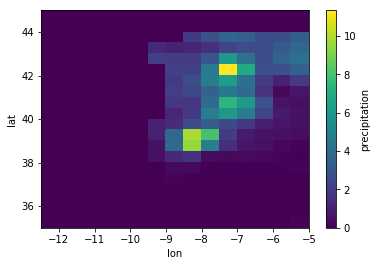

In [6]:
# from matplotlib.colors import LogNorm
plt.figure()
Europe_mean_month_preci.plot()
# plt.savefig('Sum_API_time_dimension_preci.png', dpi = 500,bbox_inches='tight')

In [7]:
Preci_week = Europe.precipitation.groupby('time.week').mean(dim='time')
# Preci_week

<Figure size 432x288 with 0 Axes>

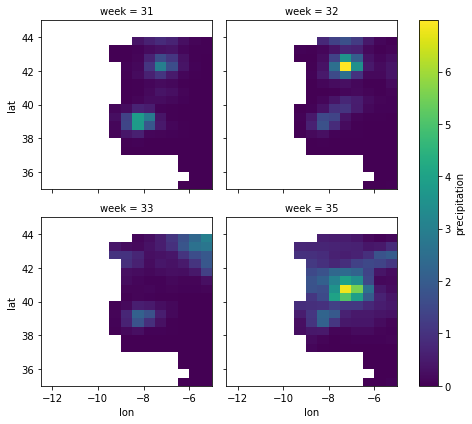

In [8]:
plt.figure()
Preci_week.plot.imshow(x='lon',y='lat',col='week',col_wrap=2)
# plt.savefig('Preci_group_Week_mean.png', dpi = 500,bbox_inches='tight')

## Analysis the number of precipitation points less than 2 mm/day

In [9]:
def above_Nsigma(x,Nsigma):
    return xr.ufuncs.fabs(x) < Nsigma

In [10]:
res = Europe.apply(above_Nsigma, Nsigma = 2)

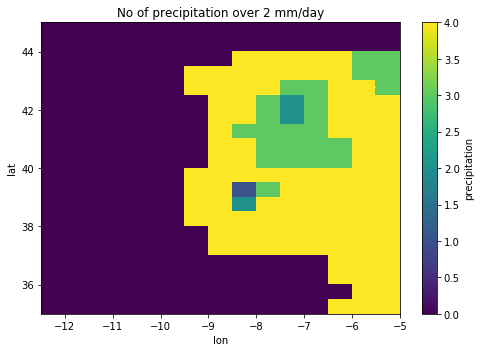

In [11]:
fig2, ax2 = plt.subplots(figsize = [7,5], ncols=1)

res.precipitation.sum(dim="time").plot(ax = ax2)
ax2.set_title("No of precipitation over 2 mm/day")

plt.tight_layout()
# plt.savefig('Preci_below_2mm.png', dpi = 500,bbox_inches='tight')